### Friction

In depth-averaged models like ADCIRC and XBeach, the dimensionless friction coeffcient $c_f$ relates bed stress $\tau$ [Pa] to depth mean current speed $U$ [m/s].

Friction velocity $u^{*}$ [m/s] is the square root of kinematic stress $\tau / \rho$ [m^2/s^2], where $\rho$ [kg/m^3] is water density.

Depth-averaged flow: $\tau$ = $c_f \rho U^2 = \rho u^{*2}$ 

The law of the wall relates current speed to elevation as

$u = (u^{*}/\kappa) \text{log}(z/zo)$

Depth-mean flow can be calculated by integrating the velocity profile from $zo$ to $h$, and dividing by $h$:

$U = (u*/\kappa)[log(h/zo)-1]$

The depth at which $U = u$ is $h/e$, so $U = (u*/\kappa)log((h/e)/zo)$

Rearranging to solve for $u^*$ and using eqn. 1 shows that

$c_f = [ \kappa / \text{log}((h/e)/zo) ]^2 $ 

Mattock and Forbes use

$c_f(n) = gn^2/h^{1/3}$

to calculates stress from depth-mean flow velocity in ADCIRC.

Solving for $n$ in terms of $zo$:

$n = [h^{1/3}/g]^{1/2} \kappa/\text{log}((h/e)/zo)$

Solving for $zo$ in terms of $n$:

$zo = \text{exp}[ -\kappa/(gn^2/h^{1/3})^2 + \text{log}(h/e) ]$

In [1]:
# check these formulae
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

h = 10.
g = 9.81
vk = 0.41
zr = 1.
zo = 0.002

cd_zo = (vk/np.log((h/np.e)/zo))**2
print('cd_zo = ',cd_zo)

n = np.sqrt(h**(1./3.)/g) * vk/np.log((h/np.e)/zo)
print('n from zo = ',n)

cd_n  = g*n**2/h**(1./3.)
print('cd_n from n = ',cd_n)

zor = np.exp( np.log(h/np.e)-vk*( g*n**2 / h**(1./3.))**(-1./2.) )

print('zo from n: ',zor)

cd_zo =  0.00297478984297
n from zo =  0.0255599681293
cd_n from n =  0.00297478984297
zo from n:  0.002


In [10]:
# Choose a shear velocity and calculate ubar
us = .05
ubar = us/vk * (np.log(h/zo)-1.)
print('Analytical value of ubar: ', ubar)

Analytical value of ubar:  0.916730877002


In [3]:
# Compare numerical estimate of depth-mean velocity with analytical value
z = np.logspace(np.log10(zo),np.log10(h),100) # the round-off error is still significant until the profile has 100K pts.
u = us/vk * np.log(z/zo)
dz = np.diff(z)
# numerical integration to estimate depth-mean velocity
ubar_num = np.sum( u[1:]*dz)/(h)
print('Numerical estimate of ubar: ',ubar_num)
ubar_ana = us/vk * np.log((h*1./(np.e))/zo)
print('Value of ubar at h/e  : ', ubar_ana)

Numerical estimate of ubar:  0.921924892574
Analytical value of ubar  :  0.916730877002


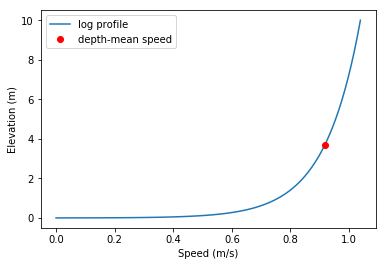

In [9]:
# plot profile and depth-mean speed
plt.plot(u,z,label='log profile')
plt.plot(ubar_ana,h/np.e,'or',label='depth-mean speed')
plt.xlabel('Speed (m/s)')
plt.ylabel('Elevation (m)')
plt.legend()